# 20 MEV Pair Check smear

In [1]:
%matplotlib inline
import os
import math
import h5py

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [2]:
fdata_dict_s20 ={
    'cosima'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/20MeVBeam-100000Trig.inc1.id1.sim',
    'ns_l2'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L2.h5',
    'ns_l3'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L3.h5', 
    'sim_h5'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/20MeVBeam-100000Trig.inc1.id1.sim.h5',
    'ns_l1'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L1.h5',
    'ns_desh'   : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.h5',
}

In [3]:
fdata_dict_s10 ={
    'cosima'    : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/10MeVBeam-100000Trig.inc1.id1.sim',
    'ns_l2'     : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.L2.h5',
    'ns_l3'     : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.L3.h5', 
    'sim_h5'    : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/10MeVBeam-100000Trig.inc1.id1.sim.h5',
    'ns_l1'     : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.L1.h5',
    'ns_desh'   : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.h5',
}

In [188]:
run = 's10'

if run == 's10':
    fdata_dict = fdata_dict_s10
elif run == 's20':
    fdata_dict = fdata_dict_s20

In [189]:
with open(fdata_dict['cosima']) as f:
    contents = f.readlines()
    

In [190]:
trk_hit_main =[]
for i in range(len(contents)):
# for i in range(400):
    line = contents[i]

    if not line.isspace():
        if (line.find('SE') >= 0):
            
            line = contents[i+1]
            curid = line.split()[1] #next line to SE is is the ID.
            
#             print(curid)

            pair_flag = False
            trk_flag = False
            
            trk_hit = []
            
            i+=1
            line = contents[i]
            while (line.find('SE') < 0):          
                
                if (line.find('IA') >= 0) and  (line.find('PAIR') >= 0):  # no. of hits
                    pair_flag = True

                if (line.find('HTsim') >= 0):  # no. of hits
                    delme = line.split()
                    if delme[1] == '1;':
                        delme1 = line.split(";")
                        trk_hit = [float(curid),float(delme1[1]),float(delme1[2]),float(delme1[3]),float(delme1[4])]
                        trk_flag = True
                        
                        if pair_flag:
                            trk_hit_main.append(trk_hit)
                
                
                    
                i+=1
                if i<len(contents):
                    line = contents[i]
                else:
                    break
            

In [191]:
#X = data[:, [1, 9]]

In [192]:
trk_hit_main = np.array(trk_hit_main)
trk_evtid = trk_hit_main[:,0] # Tracks only pair

In [193]:
print(len(np.unique(trk_evtid)))
pair_evtid= np.unique(trk_evtid)

15595


In [194]:
trk_hit_main[np.where(trk_hit_main[:,0]==76)]

array([], shape=(0, 5), dtype=float64)

# Sim h5

In [195]:
fname = fdata_dict['sim_h5']
h5_sim = h5py.File(fname,'r')

In [196]:
h5_nrg = h5_sim['Events/TKR/Energy']

In [197]:
h5_sim['Events/TKR/event_id'][0:5]

array([1, 2, 3, 4, 5])

In [198]:
nevt = h5_nrg.shape[0]
cnt_array=np.zeros((10,6,6), dtype=int)

for i in range(nevt):
    t_nrg = h5_nrg[i]
    
    for j in range(10):
        temp_nrg = t_nrg[j]
        
        a_cnt = np.count_nonzero(temp_nrg[0,:]>0.0)  # side a count
        b_cnt = np.count_nonzero(temp_nrg[1,:]>0.0)  # side b count
        
        if a_cnt>4 or b_cnt>4:
            cnt_array[j,5,5]+= 1
        else:
            cnt_array[j,a_cnt,b_cnt]+= 1

In [199]:
simh5_tothitarr = np.sum(cnt_array, axis=0)
simh5_tothitarr

array([[943028,      0,      0,      0,      0,      0],
       [     0,  21947,   7056,    389,     68,      0],
       [     0,   6992,   6333,   1928,    502,      0],
       [     0,    343,   1922,   1958,    878,      0],
       [     0,     73,    475,    929,    790,      0],
       [     0,      0,      0,      0,      0,   4389]])

# Sim L2

In [200]:
fname = fdata_dict['ns_l2']
l2_ns = h5py.File(fname,'r')
layer_list = ['layer00','layer01','layer02','layer03','layer04','layer05','layer06','layer07','layer08','layer09']

In [201]:
l2_ns['layer00/data/sync_index']

<HDF5 dataset "sync_index": shape (100001,), type "<i8">

In [202]:
evt = l2_ns['layer00/vdata/nrg'].shape[0]
l2_ns_nrg = np.zeros(shape=(evt,10,2,192))

In [203]:
for l in range(10):
    if layer_list[l] in l2_ns.keys():
        l2_ns_nrg[:,l,:,:] = l2_ns[f'{layer_list[l]}/vdata/nrg'][...]
# l2_ns_nrg

In [204]:
nevt1 = l2_ns_nrg.shape[0]
cnt_array1 =np.zeros((10,6,6), dtype=int)

for i in range(nevt):
    t_nrg = l2_ns_nrg[i]
    
    for j in range(10):
        temp_nrg =t_nrg[j]
        
        a_cnt = np.count_nonzero(temp_nrg[0,:]>0.0)  # side a count
        b_cnt = np.count_nonzero(temp_nrg[1,:]>0.0)  # side b count
        
        if a_cnt>4 or b_cnt>4:
            cnt_array1[j,5,5]+= 1
        else:
            cnt_array1[j,a_cnt,b_cnt]+= 1

In [205]:
l2_tothitarr = np.sum(cnt_array1, axis=0)
l2_tothitarr

array([[943114,      0,      0,      0,      0,      0],
       [     0,  25020,   6376,    286,     52,      0],
       [     0,   6161,   5851,   1850,    449,      0],
       [     0,    263,   1859,   1884,    848,      0],
       [     0,     66,    426,    863,    756,      0],
       [     0,      0,      0,      0,      0,   3876]])

In [239]:
l2_ns_nrg.shape

(100001, 10, 2, 192)

In [241]:
l2_ns_nrg_arr = l2_ns_nrg[l2_ns_nrg>0.0]
l2_ns_nrg_arr

array([365.55137, 365.55137, 156.65245, ...,  99.56211, 148.65841,
       148.65841])

(array([20328., 21815., 21850., 43827., 39006., 21072., 12288.,  7859.,
         5205.,  3690.,  2716.,  1905.,  1357.,  1128.,   822.,   539.,
          374.,   286.,   247.,   156.,   127.,    98.,    78.,    51.,
           45.,    29.,    20.,    11.,    19.,     8.,     6.,     9.,
            4.,     7.,     5.,     3.,     2.,     3.,     1.,     1.,
            2.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     1.]),
 array([   1.00014 ,   40.455517,   79.910894,  119.366271,  158.821648,
         198.277025,  237.732402,  277.187779,  316.643156,  356.098533,
         395.55391 ,  435.009287,  474.464664,  513.920041,  553.375418,
         592.830795,  632.286172,  671.741549,  711.196926,  750.652303,
         790.10768 ,  829.563057,  869.018434,  908.473811,  947.929188,
         987.384565, 1026.839942, 1066.295319, 1105.750696, 1145.206073,
        1184.66145 , 1224.116827, 1263.572204, 1303.027581, 1342.482958,
        1381.938335, 1421.39371

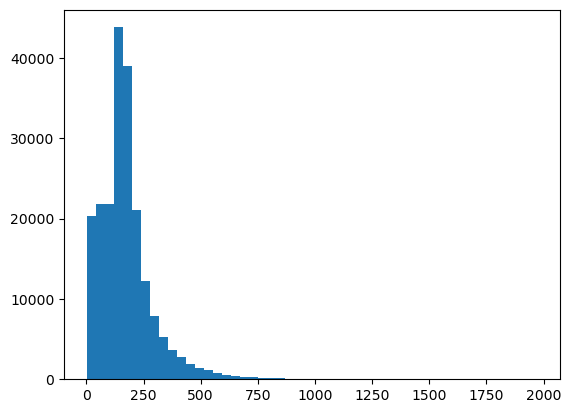

In [243]:
plt.hist(l2_ns_nrg_arr, bins=50)


## compare (transition of types from sim2h5 --> L2)

In [206]:
tot_test_arr = np.subtract(l2_tothitarr,simh5_tothitarr)
tot_test_arr

array([[  86,    0,    0,    0,    0,    0],
       [   0, 3073, -680, -103,  -16,    0],
       [   0, -831, -482,  -78,  -53,    0],
       [   0,  -80,  -63,  -74,  -30,    0],
       [   0,   -7,  -49,  -66,  -34,    0],
       [   0,    0,    0,    0,    0, -513]])

In [207]:
np.sum(tot_test_arr)

0

# Sim L3

In [208]:
fname = fdata_dict['ns_l3']
l3_ns = h5py.File(fname,'r')

In [209]:
l3_ns['tracker'].keys()

<KeysViewHDF5 ['energy', 'event_id', 'event_time', 'pulse_height']>

In [210]:
l3_ns['tracker/energy'][0:10]

array([[  1.      ,   0.2805  ,   0.1785  ,   0.025   , 365.55137 ,
          1.      ],
       [  3.      ,   0.6885  ,  -0.5865  ,  13.325   , 156.65245 ,
          1.      ],
       [  3.      ,   3.1875  ,   0.9435  ,   3.825   , 134.22256 ,
          1.      ],
       [  5.      ,  -0.3825  ,  -0.4335  ,   7.625   , 139.92301 ,
          1.      ],
       [  7.      ,  -0.6375  ,   0.6885  ,   1.925   , 119.28041 ,
          1.      ],
       [  8.      ,  -0.8925  ,   0.9435  ,   3.825   , 141.70863 ,
          3.      ],
       [  8.      ,  -1.6575  ,   0.1275  ,   3.825   , 215.492435,
          3.      ],
       [  8.      ,  -0.8925  ,   0.1275  ,   3.825   , 141.70863 ,
          2.      ],
       [  8.      ,  -1.6575  ,   0.9435  ,   3.825   , 215.492435,
          2.      ],
       [ 11.      ,  -4.437   ,  -4.6665  ,   1.925   , 116.13146 ,
          1.      ]])

In [211]:
l3_ns_nrg = l3_ns['tracker/energy'][...]

# Check Pair at different levels.

In [212]:
pair_evt = pair_evtid[0]

## Check at sim

In [213]:
trk_hit_main[np.where(trk_hit_main[:,0] == pair_evt)]

array([[  1.     ,   0.2805 ,   0.1785 ,   0.025  , 365.55137]])

## check at simh5

In [214]:
# Note that some of these, converts to 2x1y, etc gets added.
t_nrg = h5_nrg[32,:,:,:]
t_nrg[np.where(t_nrg[:,:,:]>0)]

array([177.53513, 185.2097 ,  67.40181, 210.53403, 164.70662, 104.875  ,
       131.88995,  57.55039, 305.19444, 277.93584, 111.50132,  53.2053 ,
       236.76495])

In [215]:

np.where(t_nrg[:,:,:]>0)

(array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([114, 115, 116, 117, 135, 149, 150,  84,  85,  86,  87,  88, 100]))

In [216]:
t_nrg.shape

(10, 2, 192)

## check at L2

In [217]:
t_nrg = l2_ns_nrg[3183,:,:,:]
t_nrg[np.where(t_nrg[:,:,:]>0)]

array([181.73435, 181.73435, 172.50263, 107.6739 ,  33.52767, 138.13272,
       307.36285, 280.17653, 171.66039, 307.83231])

In [218]:
np.where(t_nrg[:,:,:]>0)

(array([4, 4, 5, 5, 5, 5, 5, 5, 5, 5]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([ 83, 104,  64,  65,  81,  82,  83,  76,  78,  92]))

## Check at L3

In [219]:
np.where(t_nrg[:,:,:]>0)

(array([4, 4, 5, 5, 5, 5, 5, 5, 5, 5]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([ 83, 104,  64,  65,  81,  82,  83,  76,  78,  92]))

## Various Checks

### check at L2

In [220]:
t_nrg[6,:,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

### Check L1

In [221]:
fname = fdata_dict['ns_l1']
l1_ns = h5py.File(fname,'r')

In [222]:
l1_ns.keys()

<KeysViewHDF5 ['DEE Version', 'Header', 'layer00', 'layer01', 'layer02', 'layer03', 'layer04', 'layer05', 'layer06', 'layer07', 'layer08', 'layer09']>

In [223]:
np.array(l1_ns['layer09/vdata/channel_cm_sub'][4])
np.where( np.array(l1_ns['layer09/vdata/channel_cm_sub'][4]) > 0)

(array([], dtype=int64), array([], dtype=int64))

### RevCal desh file

In [224]:
fname = fdata_dict['ns_desh']
desh_ns = h5py.File(fname,'r')

In [225]:
np.array(desh_ns['TKR/Energy'][3,9,:,:])
np.where(np.array(desh_ns['TKR/Energy'][3,9,:,:]) >0)

(array([], dtype=int64), array([], dtype=int64))

# Statistics

## Check the 2hit L3s

In [226]:
l3_ns_nrg[:,5] > 1

array([False, False, False, ...,  True, False, False])

In [227]:
def_pair = l3_ns_nrg[l3_ns_nrg[:,5]>1]

In [228]:
dp_id = def_pair[:,0]
len(dp_id)

13100

In [229]:
uq_dp_id= np.unique(dp_id)
uq_dp_id.shape

(3223,)

> No. of events with 2x2 combinations 13763

In [230]:
trk_hit_main,trk_evtid

(array([[    1.     ,     0.2805 ,     0.1785 ,     0.025  ,   365.55137],
        [    3.     ,     0.6885 ,    -0.5865 ,    13.325  ,   156.65245],
        [    3.     ,     3.1875 ,     0.9435 ,     3.825  ,   134.22256],
        ...,
        [99974.     ,     0.2805 ,    -0.4845 ,     5.725  ,    65.10477],
        [99974.     ,     0.2295 ,    -0.4845 ,     5.725  ,   106.27957],
        [99985.     ,     0.4335 ,    -0.0255 ,     9.525  ,   176.27018]]),
 array([    1.,     3.,     3., ..., 99974., 99974., 99985.]))

## for each of the unique ID, check if that hit is correct in sim.

> Steps
* get hits for the event id from L3
* get the same hit info from sim
* compare the L3 hit with qflag 2 with sim hit.

In [231]:
NLAYERS = 10
#---- Position Constansts ----
TKR_STRIP_PITCH     = 0.051                             # [cm] 510 microns
TKR_WIDTH           = 192 * TKR_STRIP_PITCH             # [cm] 192 strips of constant pitch
TKR_EDGE            = TKR_WIDTH/2.0                     # DSSD is centered at 0, thus the edges are equivalent to half of the width
TKR_STRIP_CENTROID  = TKR_EDGE - (TKR_STRIP_PITCH)/2.0  # Gives the center of strip 191

TRK_LAYER_THICKNESS = 0.05 

TKR_LAYER_SPACING   = 1.9      
# [cm] z spacing between layers
TKR_TOP_LAYER       = (TRK_LAYER_THICKNESS/2.0) + (NLAYERS - 1) * TKR_LAYER_SPACING # [cm] Global z position of layer 0 of the TKR 


def TKR_pinpoint(xpos, ypos, zpos):

    xstrip = round((float(xpos)+TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    ystrip = round(-(float(ypos)-TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    zlayer = round(abs((float(zpos)-TKR_TOP_LAYER)/TKR_LAYER_SPACING))
    # print('X-strip # ' + str(xstrip) + '; Y-strip # ' + str(ystrip) + '; Z-layer # ' + str(zlayer))
    return xstrip, ystrip, zlayer

In [232]:
def check_hits(sim_array,hit_array):
    n_sim = sim_array.shape[0]
    n_l3 = hit_array.shape[0]
    
    ret_list = []
    for i in range(n_l3):
        tr_flg = False
        
        for j in range(n_sim):
#             print(sim_array[j,1], hit_array[i,1])
            if (sim_array[j,1] == hit_array[i,1])\
                 and sim_array[j,2] == hit_array[i,2] and \
                 sim_array[j,3] == hit_array[i,3] and abs(sim_array[j,4]-hit_array[i,4])<2.0:
                
                 tr_flg = True
        
        if tr_flg == False:
#             print(check_nbr(sim_array,hit_array[i]),'***')
            tr_flg = check_nbr(sim_array,hit_array[i])
        
        ret_list.append(tr_flg)
    return ret_list

In [233]:
# here
def check_nbr(sim_array, hit_array):
    global check_flag
    
    t_sim_array = sim_array[np.where(sim_array[:,3]==hit_array[3])] # zselection.
    n_sim = t_sim_array.shape[0] # no. of sim
    all_nrg = t_sim_array[:,4]
    all_x = np.round(t_sim_array[:,1],5)
    all_y = t_sim_array[:,2]
    
    hit_flag = False
    
    #Check for X neighbor
    com_x = np.zeros((len(all_x),len(all_x)),dtype=bool)
    com_y = np.zeros((len(all_y),len(all_y)),dtype=bool)
    
    x_gen = np.zeros((len(all_x),4),dtype=float)
    y_gen = np.zeros((len(all_y),4),dtype=float)
    for i in range(len(all_x)):
        tflag_arr=[]
        for j in range(len(all_x)):
            tflag= False
            if abs(all_x[i]==all_x[j]):
                tflag = True
            tflag_arr.append(tflag)
        
        #have array of neighbors or not. 
        
        n_neighbors = np.count_nonzero(np.array(tflag_arr)==True)
        new_y = np.round(np.sum(all_y[tflag_arr])/n_neighbors,5)
        new_x = all_x[tflag_arr][0]
        new_z = hit_array[3]
        new_nrg = np.sum(all_nrg[tflag_arr])
        
        com_x[i] = np.array(tflag_arr)
        x_gen[i] = np.array([new_x,new_y,new_z,new_nrg])
        print(new_x,new_y,new_z,new_nrg,'<<<') if check_flag else None
        print(tflag_arr,'<<<') if check_flag else None
        
        
        
        #check for hit flag.
        if (new_x == hit_array[1])\
             and new_y == hit_array[2] and \
                     new_z == hit_array[3] and abs(new_nrg-hit_array[4])<2:
                            hit_flag =True
    
    if hit_flag == True:
        return True
    #Check for Y neighbor
    for i in range(len(all_y)):
        tflag_arr=[]
        for j in range(len(all_y)):
            tflag= False
            if abs(all_y[i]==all_y[j]):
                tflag = True
            tflag_arr.append(tflag)
        
        #have array of neighbors or not. 
            
        n_neighbors = np.count_nonzero(np.array(tflag_arr)==True)
        new_x = np.round(np.sum(all_x[tflag_arr])/n_neighbors,5)
        new_y = all_y[tflag_arr][0]
        new_z = hit_array[3]
        new_nrg = np.sum(all_nrg[tflag_arr])
                
        com_y[i] = np.array(tflag_arr)
        y_gen[i] = np.array([new_x,new_y,new_z,new_nrg])
        #check for hit flag.
        if (new_x == hit_array[1])\
             and new_y == hit_array[2] and \
                     new_z == hit_array[3] and abs(new_nrg-hit_array[4])<2:
                            hit_flag =True
        print(new_x,new_y,new_z,new_nrg,'>>>>') if check_flag else None
        print(tflag_arr,'>>>>>') if check_flag else None
        if hit_flag == True:
            return True
        

    
    for i in range(com_y.shape[0]):
        if y_gen[i,0]== hit_array[1]:
            if x_gen[i,1] == hit_array[2]:
                t_nrg = x_gen[i,3]+y_gen[i,3]-all_nrg[i]
                if abs(t_nrg-hit_array[4])<2:
                    hit_flag = True
                print( i, y_gen[i,0], x_gen[i,1],t_nrg) if check_flag else None
                
    return hit_flag
    

In [234]:
check_flag = False
check_i = 0

In [235]:
# for i in range(len(uq_dp_id)):

cnt_tt = 0
cnt_bb = 0
cnt_ff = 0
cnt_tf = 0
cnt_wp = 0
cnt_tff = 0
# for i in range(100,500):
for i in range(len(uq_dp_id)):
    tid = uq_dp_id[i]
    
    
    if check_flag and i !=check_i:
        continue 
     
    t_evt_l3 = np.round(def_pair[np.where(dp_id == tid)],5)
    t_evt_sim= trk_hit_main[np.where(trk_evtid == tid)]
    
    if check_flag:
        print('==')
        print(i)
#         print(t_evt_l3)
        print('--')
        print(t_evt_sim)

          
    if t_evt_sim.shape[0]== 0:
        cnt_wp+=1
        print(i,'WP', cnt_wp) if check_flag else None
        continue
    #goodhits:
    t_evt_l3_gd = t_evt_l3[t_evt_l3[:,5]==2]
    checks = check_hits(t_evt_sim , t_evt_l3_gd)
    print(t_evt_l3_gd) if check_flag else None 
#     print(i, checks) 
          
    if checks[0] == True and checks[1]==True:
        cnt_tt+=1
        print('TT', cnt_tt) if check_flag else None
        
    elif checks[0] == False and checks[1]==False:
        cnt_tff+=1
        t_evt_l3_bd = t_evt_l3[t_evt_l3[:,5]==3]
        checks1 = check_hits(t_evt_sim , t_evt_l3_bd)
        print(checks1) if check_flag else None
        if checks1[0] == True and checks1[1]==True:
            cnt_bb+=1 
            print(i,'BB')if check_flag else None
            
        elif checks1[0] == True or checks1[1]==True:
            cnt_tf += 1
            print(i,'TFb')if check_flag else None
        else:
            cnt_ff +=1
            print(i,'FFb')if check_flag else None
            
    elif checks[0] == True or checks[1] == True:
        cnt_tf +=1
        print(i,'TFa',cnt_tf) if check_flag else None
    else:
        cnt_ff+=1
        print(i,'FFa')if check_flag else None
    print('===') if check_flag else None

In [236]:
cnt_tt, cnt_ff, cnt_bb, cnt_tf, cnt_wp, cnt_tff

(1706, 11, 0, 141, 1365, 11)

In [237]:
cnt_tt+cnt_ff+cnt_bb+cnt_tf+cnt_wp

3223

10 MeV      
* 18426


20 Mev        

Modified for cases where adding a1,b1, a2,b1 and a2b2 and had to add all 3.        
13781
(10319, 80, 1, 865, 2516, 83)

Modified to add for same hit:
(8810, 96, 1, 2344, 2509)

---
(6076, 1380, 0, 3795, 2509) = 13760         
Pie Chart/ Sankey Plot         
        
44784            

(6076, 1380, 0, 3795) = 11251
(6085, 1376, 0, 3804, 2516, 1376)

In [183]:
TKR_pinpoint(1.5045 ,  -0.1275 ,  13.325)

(125, 98, 2)

In [184]:
t_nrg = l2_ns_nrg[142,:,:,:]
t_nrg[np.where(t_nrg[:,:,:]>0)]

array([], dtype=float64)

In [185]:
np.where(t_nrg[:,:,:]>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [186]:
t_nrg1= h5_nrg[185,:,:,:]
t_nrg1[np.where(t_nrg1[:,:,:]>0)]

array([], dtype=float64)

In [187]:
np.where(t_nrg1[:,:,:]>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

# A lot of events are not in L2 pairs. What are these events like?